## Importing the necessary libraries

In [236]:
import torch #for creating tensor to store all numerical values,weights and biases values 
import torch.nn as nn #to make wieght and biases part of the neural network
import torch.nn.functional as F #gives us the activation functions 
from torch.optim import SGD #stochastic gradient descent 
import matplotlib.pyplot as plt
import seaborn as sns 

## Predicting doses effectiveness without gradient descent

In [262]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00= nn.Parameter(torch.tensor(1.7),requires_grad=False)
        self.b00=nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01=nn.Parameter(torch.tensor(-40.8),requires_grad=False)
        self.w10=nn.Parameter(torch.tensor(12.6),requires_grad=False)
        self.b10=nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11=nn.Parameter(torch.tensor(2.70),requires_grad=False)
        self.final_bias=nn.Parameter(torch.tensor(-16.0),requires_grad=False)
    def forward(self,input):
        input_to_top_relu = input*self.w00 + self.b00
        top_relu_output=F.relu(input_to_top_relu)
        scaled_top_relu_output=top_relu_output * self.w01
        input_to_bottom_relu = input*self.w11 + self.w10
        bottom_relu_output=F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output*self.w11
        input_to_final_relu= scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output=F.relu(input_to_final_relu)
        return output

In [264]:
input_doses = torch.linspace(start=0,end=1,steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [266]:
model = BasicNN()
output_values = model(input_doses) #by default it calles the forward method
output_values

tensor([18.0200, 18.7490, 19.4780, 20.2070, 20.9360, 21.6650, 15.4580,  9.2510,
         3.0440,  0.0000,  0.0000])

E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


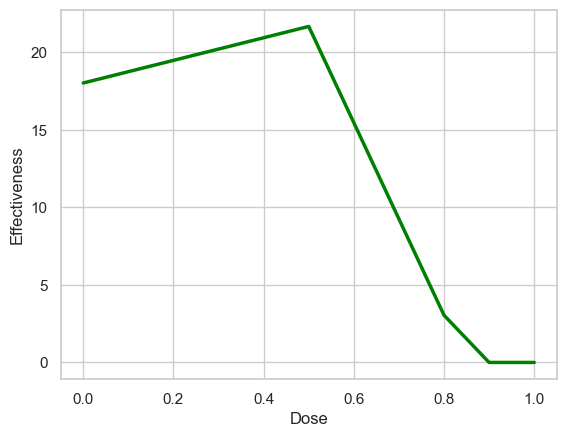

In [268]:
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,y=output_values,color='green',linewidth=2.5)
plt.xlabel('Dose')
plt.ylabel('Effectiveness')
plt.show()

## Predicting dose effectivness with gradient descent on final bias

In [241]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00= nn.Parameter(torch.tensor(1.7),requires_grad=False)
        self.b00=nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01=nn.Parameter(torch.tensor(-40.8),requires_grad=False)
        self.w10=nn.Parameter(torch.tensor(12.6),requires_grad=False)
        self.b10=nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11=nn.Parameter(torch.tensor(2.70),requires_grad=False)
        self.final_bias=nn.Parameter(torch.tensor(0.),requires_grad=True) #for optimizing the final bias value
    def forward(self,input):
        input_to_top_relu = input*self.w00 + self.b00
        top_relu_output=F.relu(input_to_top_relu)
        scaled_top_relu_output=top_relu_output * self.w01
        input_to_bottom_relu = input*self.w11 + self.w10
        bottom_relu_output=F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output*self.w11
        input_to_final_relu= scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output=F.relu(input_to_final_relu)
        return output

E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


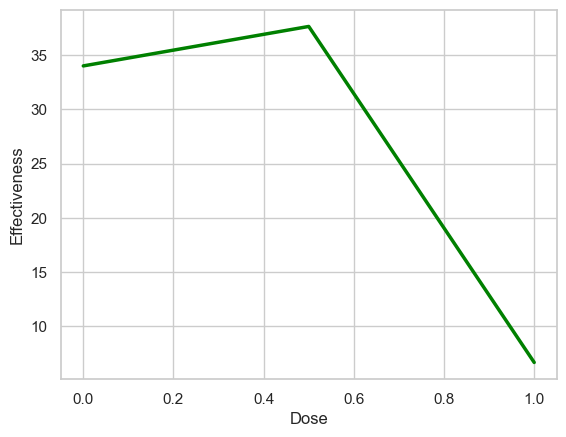

In [242]:
model = BasicNN_train()
output_values = model(input_doses) #by default it calles the forward method
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,y=output_values.detach(),color='green',linewidth=2.5) #we added detach because now the final_bias has a gradient
plt.xlabel('Dose')
plt.ylabel('Effectiveness')
plt.show()

### train the neurla network to optimize bias_final

In [244]:
inputs = torch.tensor([0,0.5,1])
labels = torch.tensor([0,1,0])

In [245]:
optimizer = SGD(model.parameters(),lr=0.1) # create an optimizer , SGD() will optimize every parameter that we set requires_grad= True
print("Final bias , before optimization: ",str(model.final_bias.data)+"\n")
for epoch in range(100):
    total_loss=0
    for iteration in range(len(inputs)):
        input_i=inputs[iteration]
        label_i=labels[iteration]
        output_i=model(input_i)
        loss = (output_i - label_i)**2 #squared residual
        loss.backward() #derivative of the squared residual with respec to b_final
        total_loss += float(loss)
    if total_loss <0.0001:
        print("Num steps: "+str(epoch))
        break
    optimizer.step()
    optimizer.zero_grad()
    print("step: "+str(epoch) + " final bias: "+str(model.final_bias.data) + "\n")
print("Final bias,after optimization: "+str(model.final_bias.data))

Final bias , before optimization:  tensor(0.)

step: 0 final bias: tensor(-15.4630)

step: 1 final bias: tensor(-23.4148)

step: 2 final bias: tensor(-28.1859)

step: 3 final bias: tensor(-31.0485)

step: 4 final bias: tensor(-32.7661)

step: 5 final bias: tensor(-33.7967)

step: 6 final bias: tensor(-34.4150)

step: 7 final bias: tensor(-34.8650)

step: 8 final bias: tensor(-35.2250)

step: 9 final bias: tensor(-35.5130)

step: 10 final bias: tensor(-35.7434)

step: 11 final bias: tensor(-35.9277)

step: 12 final bias: tensor(-36.0752)

step: 13 final bias: tensor(-36.1931)

step: 14 final bias: tensor(-36.2875)

step: 15 final bias: tensor(-36.3630)

step: 16 final bias: tensor(-36.4234)

step: 17 final bias: tensor(-36.4717)

step: 18 final bias: tensor(-36.5104)

step: 19 final bias: tensor(-36.5413)

step: 20 final bias: tensor(-36.5660)

step: 21 final bias: tensor(-36.5858)

step: 22 final bias: tensor(-36.6017)

step: 23 final bias: tensor(-36.6143)

step: 24 final bias: tensor

E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


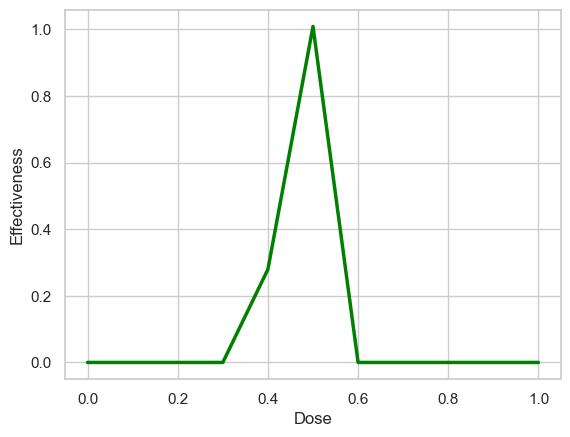

In [246]:
output_values = model(input_doses) #by default it calles the forward method
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,y=output_values.detach(),color='green',linewidth=2.5) #we added detach because now the final_bias has a gradient
plt.xlabel('Dose')
plt.ylabel('Effectiveness')
plt.show()